# STOP!!! READ THIS FIRST

You should only look at these solutions once you think you have working solutions of your own :).

# Section 7 - 2D Uncertainties

Sometimes you have errors not only in the $y$ direction but also in $x$. What do?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline
plt.rc("text", usetex=True)
plt.rc("font", size=24)
plt.rc("errorbar", capsize=3)

## Exercise 13 - Standard metho

Here we use the "standard" method of doing a linear fit to data with 2D uncertanties, which is to model the angle of the line and the orthogonal offset of the points instead of the slope and intercept.

77.905242923 0.9


(350, 470)

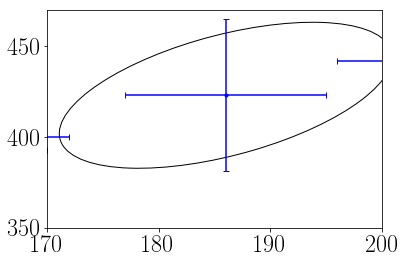

In [70]:
#Get the data. We only want x, y and the error on y
_, x_all, y_all, sigy_all, sigx_all, rxy_all = np.genfromtxt("data.txt", unpack=True, delimiter='&', skip_header=1)
sigxy_all = rxy_all*sigy_all*sigx_all #The covariance instead of the correlation
N_data = len(x_all)
def get_all_data():
    return x_all, y_all, sigy_all, sigx_all, sigxy_all, rxy_all

def get_good_data():
    #Points 4 onward
    return x_all[4:], y_all[4:], sigy_all[4:], sigx_all[4:], sigxy_all[4:], rxy_all[4:]

def get_bad_data():
    #Points 0 through 3
    return x_all[:4], y_all[:4], sigy_all[:4], sigx_all[:4], sigxy_all[:4], rxy_all[:4]

x, y, sigy, sigx, sigxy, rxy = get_good_data()
angles = np.arctan(sigy/sigx)
widths  = 2*np.sqrt( (sigx*np.cos(angles))**2 + (sigy*np.sin(angles))**2)
heights = 2*np.sqrt( (sigx*np.sin(angles))**2 + (sigy*np.cos(angles))**2)
plt.errorbar(x, y, xerr=sigx, yerr=sigy, c='b', marker='.', ls='')
ells = [Ellipse(xy=(x[i],y[i]), width=widths[i], height=heights[i], angle=-angles[i]*180./np.pi, fill=False)\
        for i in range(len(x))]
ells = [Ellipse(xy=(x[i],y[i]), width=widths[i], height=heights[i], angle=angles[i]*180./np.pi, fill=False)\
        for i in xrange(12,13)]
print angles[12]*180/np.pi, rxy[12]
for e in ells:
    plt.gca().add_artist(e)
plt.xlim(170, 200)
plt.ylim(350, 470)
#plt.xlim(0, 300)
#plt.ylim(0, 700)